# 과대적합 문제 해결

- 모델 크기 조절
    - 레이어의 유닛수와 레이어의 수를 조절  
    
    
- 규제화(Regularization) 


- 드롭아웃(Dropout)

### 데이터 로드 및 전처리

- 모델의 학습에 사용하기 위해 원-핫 인코딩(one-hot encoding)을 위한 함수를 정의
- imdb.load_data()를 통해 IMDB 데이터를 다운로드
- 10000 차원의 학습 데이터로 원-핫 인코딩을 수행

In [2]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성 및 컴파일
- rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용하도록 컴파일

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [4]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 75ms/step - loss: 0.4287 - accuracy: 0.8094 - val_loss: 0.3033 - val_accuracy: 0.8754
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2416 - accuracy: 0.9037 - val_loss: 0.2782 - val_accuracy: 0.8873
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1732 - accuracy: 0.9340 - val_loss: 0.3364 - val_accuracy: 0.8692
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1230 - accuracy: 0.9549 - val_loss: 0.3841 - val_accuracy: 0.8619
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 0.0827 - accuracy: 0.9718 - val_loss: 0.4205 - val_accuracy: 0.8712
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.0581 - accuracy: 0.9793 - val_loss: 0.3874 - val_accuracy: 0.8743
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.0369 - accuracy: 0.9898 - val_loss: 0.4960 - val_accuracy: 0.8737
Epoch 8/30
49

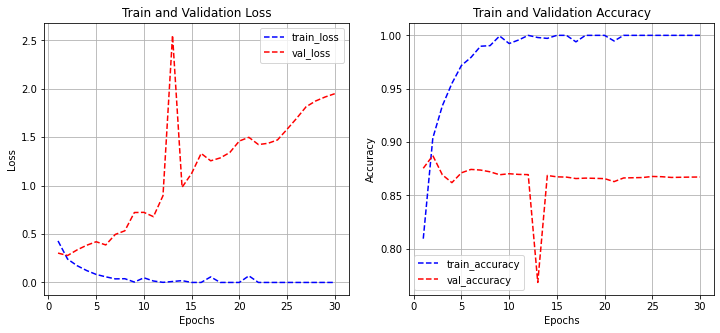

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

딥러닝 모델이 과대적합된 상태인 것을 알 수 있음.  

따라서 과대적합을 해결하기 위한 방법을 찾아야 함.

## 모델 크기 조절

### 모델 크기 증가

In [6]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 2048)              20482048  
_________________________________________________________________
hidden3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
output3 (Dense)              (None, 1)                 2049      
Total params: 24,680,449
Trainable params: 24,680,449
Non-trainable params: 0
_________________________________________________________________


In [7]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 88ms/step - loss: 0.7472 - accuracy: 0.7964 - val_loss: 0.3347 - val_accuracy: 0.8578
Epoch 2/30
49/49 [==============================] - 2s 38ms/step - loss: 0.2289 - accuracy: 0.9135 - val_loss: 0.3301 - val_accuracy: 0.8740
Epoch 3/30
49/49 [==============================] - 2s 38ms/step - loss: 0.1171 - accuracy: 0.9574 - val_loss: 0.4589 - val_accuracy: 0.8543
Epoch 4/30
49/49 [==============================] - 2s 38ms/step - loss: 0.0598 - accuracy: 0.9842 - val_loss: 0.4918 - val_accuracy: 0.8802
Epoch 5/30
49/49 [==============================] - 2s 37ms/step - loss: 0.1536 - accuracy: 0.9838 - val_loss: 0.5932 - val_accuracy: 0.8712
Epoch 6/30
49/49 [==============================] - 2s 38ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.6250 - val_accuracy: 0.8853
Epoch 7/30
49/49 [==============================] - 2s 38ms/step - loss: 0.1610 - accuracy: 0.9882 - val_loss: 0.5411 - val_accuracy: 0.8855
Epoch 8/30
49

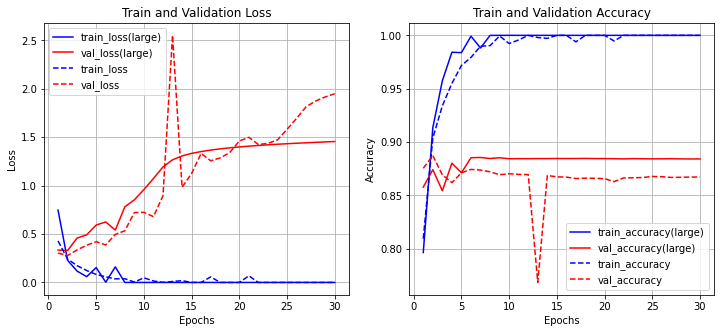

In [8]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기가 클수록, 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고, 학습 손실이 낮아지는 것을 알 수 있음.  
모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능  


### 모델 크기 감소

In [9]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 16)                160016    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 67ms/step - loss: 0.4587 - accuracy: 0.8192 - val_loss: 0.3502 - val_accuracy: 0.8769
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2659 - accuracy: 0.9094 - val_loss: 0.2877 - val_accuracy: 0.8880
Epoch 3/30
49/49 [==============================] - 1s 16ms/step - loss: 0.2034 - accuracy: 0.9268 - val_loss: 0.2889 - val_accuracy: 0.8846
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1704 - accuracy: 0.9397 - val_loss: 0.3050 - val_accuracy: 0.8781
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1449 - accuracy: 0.9508 - val_loss: 0.3139 - val_accuracy: 0.8781
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1245 - accuracy: 0.9579 - val_loss: 0.3539 - val_accuracy: 0.8708
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1094 - accuracy: 0.9633 - val_loss: 0.3605 - val_accuracy: 0.8695
Epoch 8/30
49

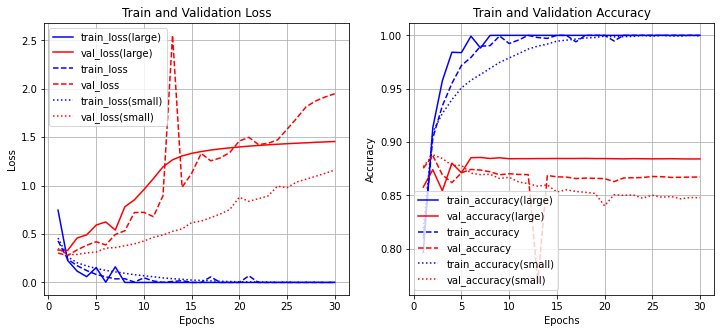

In [11]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 최적화를 위해서는 파라미터 수를 적절하게 조절

## 규제(Regularization)
- 가중치의 파라미터 값이 커서 과대적합이 발생하는 경우가 많기 때문에 이를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화
- 규제를 통해 가중치의 절댓값을 가능한 작게 만들어서 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것을 의미
- 기울기를 작게 만드는 과정

- 규제가 모델이 과대적합 되지 않도록 강제로 제한하는 역할을 하므로 적절한 규제값을 찾는 것이 중요  

- L1 규제는 가중치의 절댓값에 비례하는 비용이 추가
- L2 규제는 가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례하는 비용이 추가
- L1, L2 둘다 합쳐서 사용하는 경우도 존재

### L1 규제
- 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가 하는 방법
- 가중치의 절대값은 L1 노름(norm)이라고 함

- 케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 가중치 정규화인 kernel_regularizer를 l1으로 지정
- 편향 정규화인 bias_regularizer와 출력값 정규화인 activity_regularizer에도 적용할 수 있음

In [12]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 3.7376 - accuracy: 0.5836 - val_loss: 1.9320 - val_accuracy: 0.6340
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 1.8626 - accuracy: 0.6630 - val_loss: 1.7948 - val_accuracy: 0.7018
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 1.7565 - accuracy: 0.7065 - val_loss: 1.7165 - val_accuracy: 0.7020
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 1.6636 - accuracy: 0.7354 - val_loss: 1.6104 - val_accuracy: 0.7570
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 1.5784 - accuracy: 0.7599 - val_loss: 1.5462 - val_accuracy: 0.7607
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 1.5070 - accuracy: 0.7745 - val_loss: 1.4666 - val_accuracy: 0.7839
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 1.4492 - accuracy: 0.7909 - val_loss: 1.4355 - val_accuracy: 0.7958
Epoch 8/30
49

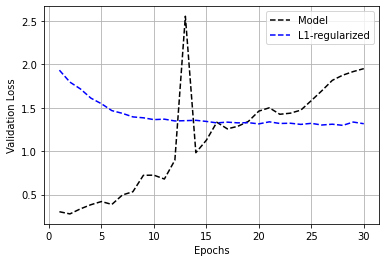

In [14]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 규제 결과는 안정적으로 Loss 값이 감소되는 것을 알 수 있음

### L2 규제
- 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법
- 가중치의 제곱은 L2 노름(norm) 이라고 함

- L2 규제는 L1보다 더 Robust한 모델을 생성하므로 많이 사용되는 방법
- 케라스에서 L2 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l2로 지정

In [15]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 69ms/step - loss: 0.7630 - accuracy: 0.7243 - val_loss: 0.6326 - val_accuracy: 0.8082
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.5579 - accuracy: 0.8750 - val_loss: 0.5605 - val_accuracy: 0.8358
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4917 - accuracy: 0.8872 - val_loss: 0.5070 - val_accuracy: 0.8672
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4590 - accuracy: 0.8908 - val_loss: 0.4626 - val_accuracy: 0.8832
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4381 - accuracy: 0.8917 - val_loss: 0.4482 - val_accuracy: 0.8824
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4262 - accuracy: 0.8941 - val_loss: 0.4424 - val_accuracy: 0.8819
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4128 - accuracy: 0.8982 - val_loss: 0.4472 - val_accuracy: 0.8720
Epoch 8/30
49

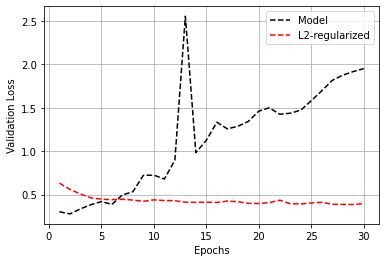

In [17]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L2 규제 방법은 기존 모델 결과와 비교해 Loss 값이 매우 낮게 감소되어 과대적합 문제를 해결하는 것을 알 수 있음.

### L1 L2 규제
- 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정


In [18]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - ETA: 0s - loss: 3.8938 - accuracy: 0.5894

In [ ]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있음

In [ ]:
# Regularized 비교 
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요

## 드롭아웃(Dropout)
- 모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용 

**드롭아웃(Dropout) 20%**

In [ ]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

In [ ]:
# 기존과 결과 비교 
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**드롭아웃 (50%)**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

In [ ]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

드롭아웃을 50% 적용한 모델이 과대적합 정도가 가장 많이 감소  
여전히 과대적합이 발생된 상태라서 다른 규제 방법도 같이 적용할 필요가 있음